# Imports

In [881]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data

In [882]:
data = pd.read_csv("CO2 Emissions_Canada.csv")
data.head(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


# Features & Output
- Engine Size (L)
- cylinders
- Fuel Consumption City (L/100 km)
- Fuel Consumption Hwy (L/100 km)
- Fuel Consumption Comb (L/100 km)

In [883]:
x1 = np.array(data["Engine Size(L)"])
x2 = np.array(data["Cylinders"])
x3 = np.array(data["Fuel Consumption City (L/100 km)"])
x4 = np.array(data["Fuel Consumption Hwy (L/100 km)"])
x5 = np.array(data["Fuel Consumption Comb (L/100 km)"])
y = np.array(data["CO2 Emissions(g/km)"])
print(f"x's ->\n\n{x1}\n{x2}\n{x3}\n{x4}\n{x5}\n", end="\n")
print(f"y ->\n\n{y}")

x's ->

[2.  2.4 1.5 ... 2.  2.  2. ]
[4 4 4 ... 4 4 4]
[ 9.9 11.2  6.  ... 11.7 11.2 12.2]
[6.7 7.7 5.8 ... 8.6 8.3 8.7]
[ 8.5  9.6  5.9 ... 10.3  9.9 10.7]

y ->

[196 221 136 ... 240 232 248]


# Normalize Data

In [884]:
def normalize(X):   
    result = []     
    maximum = max(X)
    for item in X:
        result.append(round(item/maximum, 2))
    return result

x1_normalized = np.array(normalize(x1))
x2_normalized = np.array(normalize(x2))
x3_normalized = np.array(normalize(x3))
x4_normalized = np.array(normalize(x4))
x5_normalized = np.array(normalize(x5))

print(f"x's ->\n\n{x1_normalized}\n{x2_normalized}\n{x3_normalized}\n{x4_normalized}\n{x5_normalized}\n")

x's ->

[0.24, 0.29, 0.18, 0.42, 0.42, 0.42, 0.42, 0.44, 0.44, 0.29, 0.29, 0.42, 0.21, 0.7, 0.7, 0.56, 0.56, 0.56, 0.56, 0.7, 0.24, 0.24, 0.24, 0.24, 0.24, 0.24, 0.24, 0.36, 0.36, 0.36, 0.36, 0.36, 0.48, 0.36, 0.36, 0.48, 0.75, 0.36, 0.24, 0.24, 0.36, 0.36, 0.24, 0.36, 0.36, 0.5, 0.5, 0.62, 0.62, 0.5, 0.5, 0.62, 0.62, 0.5, 0.5, 0.48, 0.36, 0.36, 0.36, 0.36, 0.36, 0.48, 0.48, 0.48, 0.36, 0.24, 0.24, 0.24, 0.24, 0.48, 0.71, 0.48, 0.71, 0.71, 0.71, 0.81, 0.24, 0.24, 0.24, 0.24, 0.24, 0.24, 0.24, 0.24, 0.24, 0.24, 0.36, 0.36, 0.36, 0.36, 0.36, 0.24, 0.24, 0.24, 0.36, 0.36, 0.36, 0.36, 0.24, 0.24, 0.36, 0.36, 0.36, 0.52, 0.52, 0.36, 0.52, 0.52, 0.52, 0.36, 0.52, 0.52, 0.71, 0.36, 0.36, 0.36, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.24, 0.36, 0.24, 0.36, 0.36, 0.52, 0.52, 0.36, 0.52, 0.24, 0.24, 0.36, 0.36, 0.36, 0.43, 0.43, 0.17, 0.17, 0.43, 0.43, 0.43, 0.43, 0.29, 0.24, 0.24, 0.24, 0.29, 0.24, 0.24, 0.29, 0.24, 0.24, 0.3, 0.43, 0.24, 0.43, 0.43, 0.43, 0.24, 0.43, 0.24,

# Assembling Features

In [885]:
def assemble_features(*features):
    result = []            
    for i in range(0, len(features[0])):
        line_to_add = []
        for feature in features:
            line_to_add.append(feature[i])
        result.append(line_to_add)
    return result    

X = np.array(assemble_features(x1_normalized,x2_normalized,x3_normalized,x4_normalized,x5_normalized))
Y = y


print(f"x's ->\n\n{X}\n", end="\n")
print(f"y ->\n\n{Y}")


x's ->

[[0.24 0.25 0.32 0.33 0.33]
 [0.29 0.25 0.37 0.37 0.37]
 [0.18 0.25 0.2  0.28 0.23]
 ...
 [0.24 0.25 0.38 0.42 0.39]
 [0.24 0.25 0.37 0.4  0.38]
 [0.24 0.25 0.4  0.42 0.41]]

y ->

[196 221 136 ... 240 232 248]


# Train & Test Data

In [886]:
split_index = int(0.8 * len(X))

X_train = X[:split_index]
Y_train = y[:split_index]

X_test = X[split_index:]
Y_test = y[split_index:]

# Model

In [887]:
def F(X, w, b):
    return np.dot(w, X) + b    

# Cost Function (J)

In [888]:
def J(X, y, w, b):
    m = len(X)
    sum = 0
    for i in range(m):
        sum += (F(X[i], w, b) - y[i]) ** 2
    return sum / (2 * m)
    

# Compute Gradient

In [889]:
def gradient(X, y, w, b):
    m, n = len(X), len(X[0])

    d_dw, d_db = np.zeros(n,), 0
    for i in range(m):
        error = F(X[i], w, b) - y[i]
        for j in range(n):
            d_dw[j] += error * X[i][j]
        d_db += error
    
    return d_dw, d_db
        
    

# Gradient Descent

In [890]:
def gradient_descent(X: np.ndarray, y, w_in, b_in, gradient, J, alpha, iterations):
    history = {}
    w = w_in
    b = b_in

    for i in range(iterations):        
        d_dw, d_db = gradient(X, y, w, b)
        w = w - alpha * d_dw
        b = b - alpha * d_db

        cost = J(X, y, w, b)
        if i % 50 == 0:
            print(f"Iteration: {i}\t|\tcost: {cost} |\tw: {w} |\tb: {b}")
        history[i] = cost

    return w, b, history


# Feed Train Data

In [891]:
w_in = np.array([0, 0, 0, 0, 0])
b_in = 0
alpha = 0.0001
iterations = 1000

w_final, b_final, history = gradient_descent(X_train, Y_train, w_in, b_in, gradient, J, alpha, iterations)


Iteration: 0	|	cost: 707.2277031732797 |	w: [61.263306 55.757726 65.058481 68.619549 66.320314] |	b: 148.3377
Iteration: 50	|	cost: 247.50489356930385 |	w: [90.06453886 71.14658987 83.27364315 81.24430622 82.49350044] |	b: 87.3221750503193
Iteration: 100	|	cost: 226.6764522014924 |	w: [97.89154334 76.76762521 92.46770373 88.60049323 90.9825736 ] |	b: 71.131280717658
Iteration: 150	|	cost: 223.67578129935856 |	w: [97.9331222  78.14597292 96.85518152 92.15833662 95.02540315] |	b: 65.34452390000126
Iteration: 200	|	cost: 222.74194193868047 |	w: [95.85560908 78.40769137 99.49923742 94.22837305 97.41705358] |	b: 62.96106677397438
Iteration: 250	|	cost: 222.20215668635228 |	w: [ 93.39093139  78.49345874 101.41004363  95.5972359   99.08795415] |	b: 61.74505316764978
Iteration: 300	|	cost: 221.82672043067288 |	w: [ 91.03746029  78.66183311 102.94039902  96.55876134 100.36976961] |	b: 60.97233959947987
Iteration: 350	|	cost: 221.55166644802222 |	w: [ 88.91250358  78.96314956 104.22882612  97.24

# Cost Per Iteration

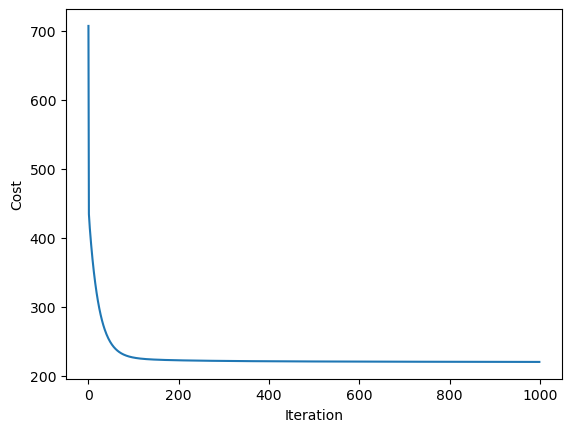

In [892]:
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.plot(list(history.keys()), list(history.values()))
plt.show()

# Accuracy

In [893]:
def accuracy(X, Y, w, b):
    sum = 0
    length = len(X)
    for i in range(length):
        model_output = round(F(X[i], w, b), 2)
        actual_output = Y[i]
        if i % 100 == 0:
            print(f"{X[i]} -> model -> {model_output}\t|\tactual output -> {actual_output}")
        sum += (1 - (abs(model_output - actual_output) / actual_output)) * 100
    return sum/length

accuracy_final = accuracy(X_test, Y_test, w_final, b_final)
print(f"\n\n***********************\n*** Accuracy {round(accuracy_final, 2)}% ***\n***********************")

[0.21 0.25 0.27 0.34 0.3 ] -> model -> 190.26	|	actual output -> 181
[0.36 0.38 0.37 0.41 0.38] -> model -> 239.33	|	actual output -> 268
[0.32 0.38 0.41 0.45 0.42] -> model -> 248.99	|	actual output -> 259
[0.24 0.25 0.36 0.42 0.38] -> model -> 218.86	|	actual output -> 234
[0.36 0.38 0.38 0.44 0.4 ] -> model -> 245.49	|	actual output -> 243
[0.24 0.25 0.33 0.36 0.34] -> model -> 205.43	|	actual output -> 209
[0.24 0.25 0.37 0.44 0.39] -> model -> 222.99	|	actual output -> 241
[0.52 0.5  0.44 0.45 0.45] -> model -> 280.93	|	actual output -> 273
[0.63 0.5  0.45 0.49 0.47] -> model -> 296.22	|	actual output -> 286
[0.39 0.38 0.42 0.5  0.45] -> model -> 263.34	|	actual output -> 274
[0.24 0.25 0.34 0.36 0.35] -> model -> 207.61	|	actual output -> 211
[0.38 0.38 0.42 0.44 0.43] -> model -> 254.66	|	actual output -> 259
[0.42 0.38 0.25 0.41 0.3 ] -> model -> 221.78	|	actual output -> 185
[0.24 0.25 0.3  0.33 0.31] -> model -> 195.95	|	actual output -> 190
[0.24 0.25 0.42 0.47 0.44] -> mode